## Лабораторна робота 1.1

Завдання: За посиланням https://www.kaggle.com/datasets/nelgiriyewithana/top-spotifysongs-2023
Скачати файл Most Streamed Spotify Songs 2023 і виконати для нього 
наступні завдання

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Завдання 1

Завдання полягає в тому, щоб побудувати горизонтальну стовпчикову 
діаграму, на якій відображаються 10 найпопулярніших пісень на Spotify у 
2023 році за кількістю прослуховувань.

In [2]:
#Завантажемо датасет
db = pd.read_csv("spotify-2023.csv", encoding="latin-1")

print(db.head(20))

                                           track_name  \
0                 Seven (feat. Latto) (Explicit Ver.)   
1                                                LALA   
2                                             vampire   
3                                        Cruel Summer   
4                                      WHERE SHE GOES   
5                                            Sprinter   
6                                     Ella Baila Sola   
7                                            Columbia   
8                                            fukumean   
9                                     La Bebe - Remix   
10                                          un x100to   
11                                          Super Shy   
12                                            Flowers   
13                                           Daylight   
14                                          As It Was   
15                                          Kill Bill   
16                             

In [3]:
#Визначимо кількість пропусків
missing_sum = db.isnull().sum()

print("Сума пропусків в кожній колонці: ")
print(missing_sum)

Сума пропусків в кожній колонці: 
track_name               0
artist(s)_name           0
artist_count             0
released_year            0
released_month           0
released_day             0
in_spotify_playlists     0
in_spotify_charts        0
streams                  0
in_apple_playlists       0
in_apple_charts          0
in_deezer_playlists      0
in_deezer_charts         0
in_shazam_charts        50
bpm                      0
key                     95
mode                     0
danceability_%           0
valence_%                0
energy_%                 0
acousticness_%           0
instrumentalness_%       0
liveness_%               0
speechiness_%            0
dtype: int64


In [4]:
#Визначимо кількість рядків і стовпчиків за допомогою атрибуту shape 
num_rows, num_columns = db.shape

print(f"Кількість рядків: {num_rows}, Кількість стобчиків: {num_columns}")

Кількість рядків: 953, Кількість стобчиків: 24


In [5]:
#Визначимо тип даних
print("Тип даних: \n", db.dtypes)

Тип даних: 
 track_name              object
artist(s)_name          object
artist_count             int64
released_year            int64
released_month           int64
released_day             int64
in_spotify_playlists     int64
in_spotify_charts        int64
streams                 object
in_apple_playlists       int64
in_apple_charts          int64
in_deezer_playlists     object
in_deezer_charts         int64
in_shazam_charts        object
bpm                      int64
key                     object
mode                    object
danceability_%           int64
valence_%                int64
energy_%                 int64
acousticness_%           int64
instrumentalness_%       int64
liveness_%               int64
speechiness_%            int64
dtype: object


                                track_name     streams
12                                 Flowers  1316855716
6                          Ella Baila Sola   725980112
133  Shakira: Bzrp Music Sessions, Vol. 53   721975598
34                                     TQG   618990393
9                          La Bebe - Remix   553634067
49                     Die For You - Remix   518745108
10                               un x100to   505671438
16                       Cupid - Twin Ver.   496795686
160                                    PRC   436027885
131                                    OMG   430977451


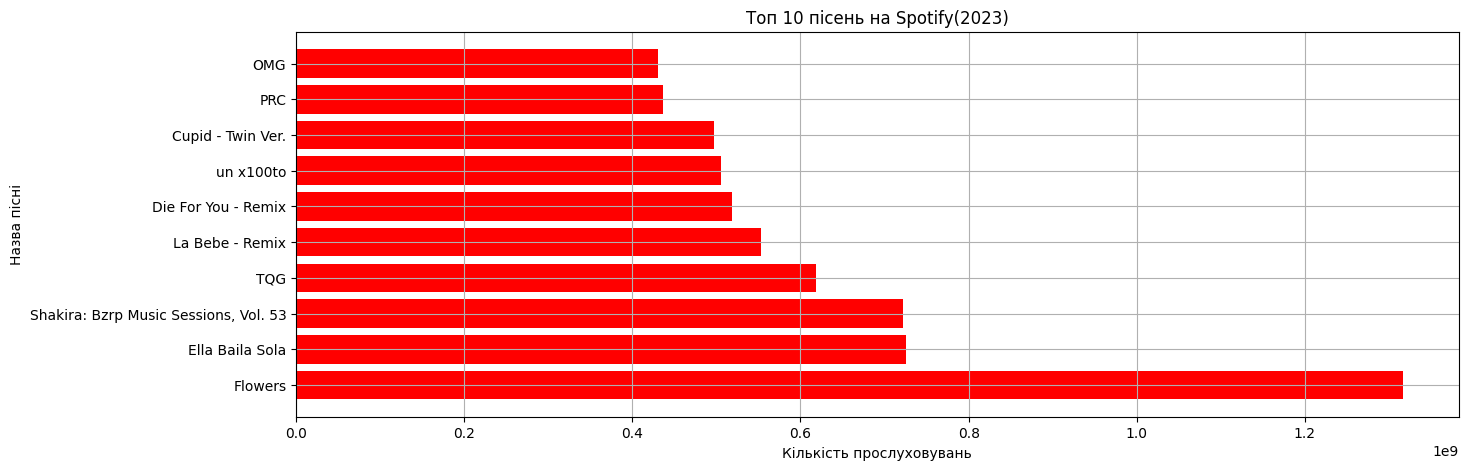

In [6]:
#Визначемо 10 найпопулярніших пісень на Spotify у 2023 році за кількістю прослуховувань
top_songs_2023 = db[db['released_year'] == 2023][['track_name','streams']]
top_songs_2023.loc[:, 'streams'] = pd.to_numeric(top_songs_2023['streams'], errors='coerce')
top= top_songs_2023[['track_name','streams']].sort_values(by = 'streams', ascending= False).head(10)

print(top)

#Побудуємо горизонтальну стобчикову діаграму
plt.figure(figsize=(15, 5))
plt.barh(top['track_name'], top['streams'], color='red')
plt.xlabel('Кількість прослуховувань')
plt.ylabel('Назва пісні')
plt.title('Топ 10 пісень на Spotify(2023)')
plt.grid()
plt.show()

### Завдання 2

Розподіл жанрів найпопулярніших пісень: Створіть кругову діаграму або 
секторну діаграму, яка відображає розподіл жанрів серед 
найпопулярніших пісень у 2023 ро 
#### Увага: Використано стобчик, який відповідає за тональність (мінор чи мажор)ці.

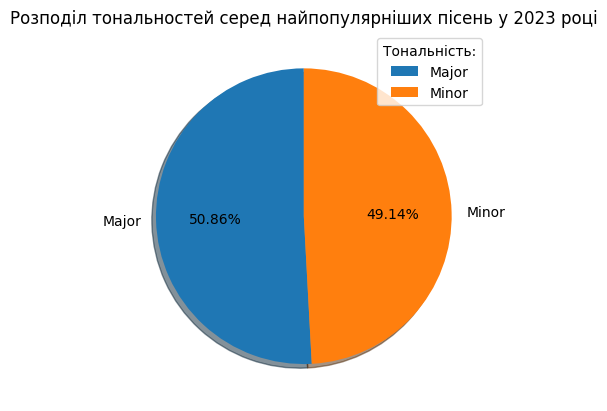

In [7]:
songs_in_2023 = db[db["released_year"] == 2023]
mode_distr = songs_in_2023['mode'].value_counts()

plt.pie(mode_distr, labels=mode_distr.index, shadow=True, autopct='%.2f%%', startangle=90)
plt.legend(mode_distr.index, title='Тональність:', loc='upper right')
plt.title('Розподіл тональностей серед найпопулярніших пісень у 2023 році')
plt.show()

### Завдання 3

Динаміка популярності треку в залежності від часу: Побудуйте лінійний 
графік, який відображає зміни кількост випуску треків по місяцях 
протягом року 2023 рок
#### Увага: побудовано лінійних графік залежності кількості пісень від місяця 2023 рокуу.

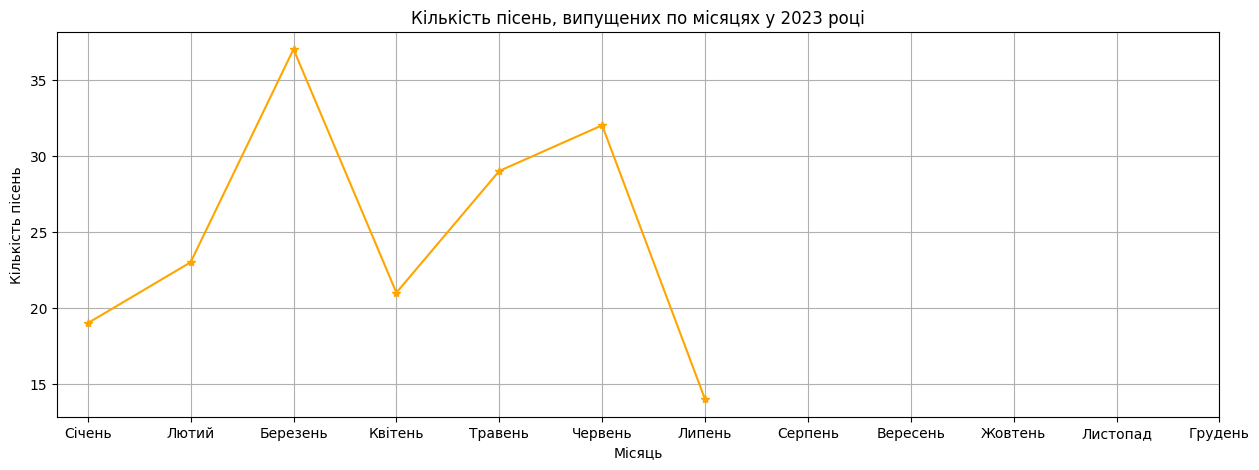

In [8]:
songs_in_2023 = db[db["released_year"] == 2023]
month_counts = songs_in_2023.groupby('released_month')['track_name'].count()
month_labels = ['Січень', 'Лютий', 'Березень', 'Квітень', 'Травень', 'Червень', 'Липень', 'Серпень', 'Вересень', 'Жовтень', 'Листопад', 'Грудень']

plt.figure(figsize=(15, 5))
plt.plot(month_counts.index-1, month_counts.values, marker='*', color = 'orange')
plt.title('Кількість пісень, випущених по місяцях у 2023 році')
plt.xlabel('Місяць')
plt.ylabel('Кількість пісень')
tick_positions = range(len(month_labels))
plt.xticks(tick_positions, month_labels)
plt.grid()
plt.show()

### Завдання 4

Рейтинг артистів на Spotify: Створіть стовпчикову діаграму, на якій 
відображаються 10 найпопулярніших артистів на Spotify у 2023 році за 
кількістю слухачів

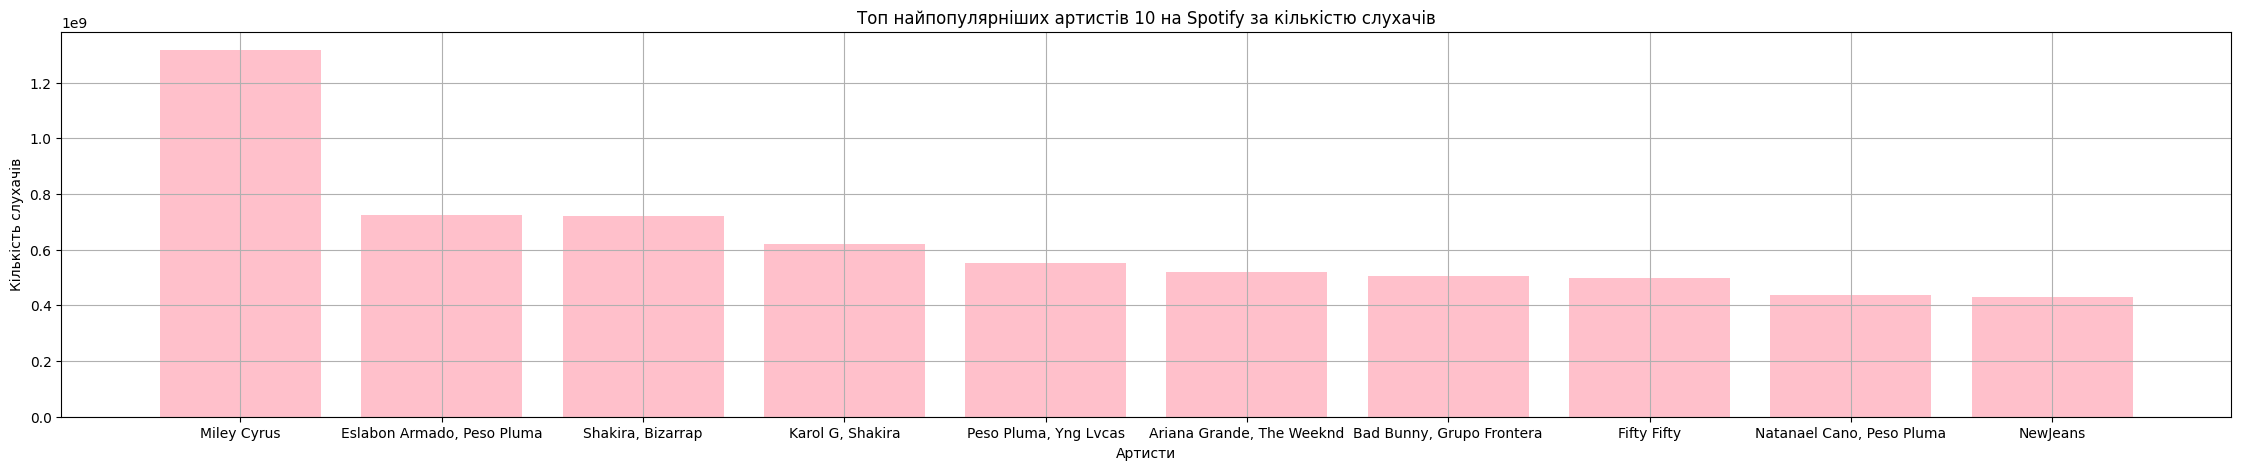

In [9]:
top_artists_2023 = db[db['released_year'] == 2023][['artist(s)_name','streams']]
top_artists_2023.loc[:, 'streams'] = pd.to_numeric(top_artists_2023['streams'], errors='coerce')
top= top_artists_2023[['artist(s)_name','streams']].sort_values(by = 'streams', ascending= False).head(10)

plt.figure(figsize=(28, 5))
plt.bar(top['artist(s)_name'], top['streams'], color='pink')
plt.xlabel('Артисти')
plt.ylabel('Кількість слухачів')
plt.title('Топ найпопулярніших артистів 10 на Sрotify за кількістю слухачів')
plt.grid()
plt.show()

### Завдання 5

Порівняння популярності трьох треків: Побудуйте горизонтальну 
стовпчикову діаграму, яка порівнює кількість прослуховувань трьох 
конкретних треків у 2023 році.

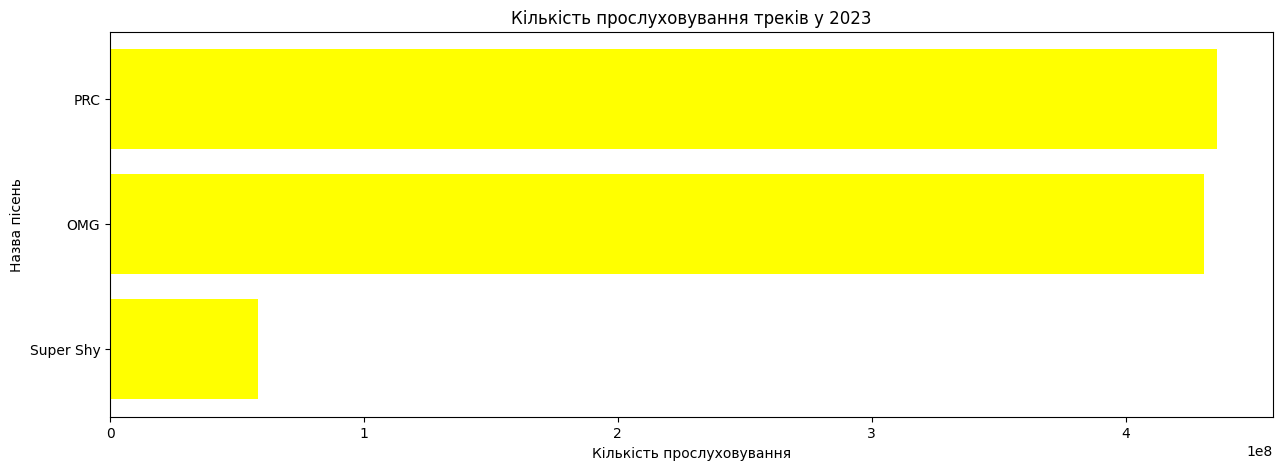

In [10]:
slct_songs = ["Super Shy", "OMG", "PRC"]
songs_db = db[(db["released_year"] == 2023) & db["track_name"].isin(slct_songs)]
songs_db.loc[:, 'streams'] = pd.to_numeric(songs_db['streams'], errors='coerce')

plt.figure(figsize=(15, 5))
plt.barh(songs_db['track_name'], songs_db['streams'], color='yellow')
plt.yticks(range(len(songs_db['track_name'])), slct_songs)
plt.xlabel('Кількість прослуховування')
plt.ylabel('Назва пісень')
plt.title('Кількість прослуховування треків у 2023')
plt.show()

#### Висновок: 
На лабораторній роботі, я навчилася створювати гістаграми різних типів за допомогою бібліотеки Matplotlib та аналізувати дані за їх результатами.